## A3 ENTRENAMIENTO DE UNA RED NEURONAL SIMPLE
### Nombre: **Diego Armando Trejo Piña**
### Matricula: **1903825**
### Clase: **L-M-V a N1**

***Para comenzar con nuestra Red Neuronal Simple, comenzamos importando las librerias que vamos a utilizar***

In [246]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


***Ahora importamos el set de datos MNIST, una guia que contiene imagenes de digitos escrito a mano, 0, 1, 2, etc.***

In [248]:
mnist = keras.datasets.mnist 
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


***Exploramos y pre-procesamos el set de datos***

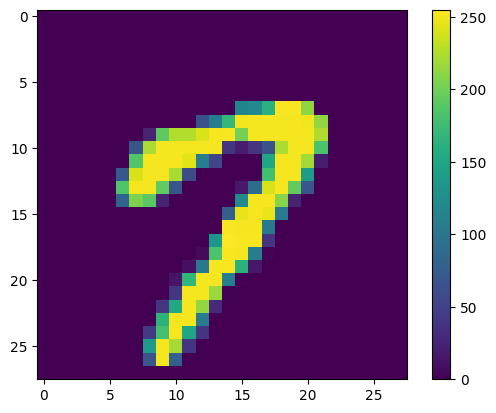

In [249]:
class_name = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
#Explore el formato de el set de datos antes de entrenar el modelo
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

#El set de datos debe ser pre-procesado antes de entrenar la red.
plt.figure()
plt.imshow(train_images[15])
plt.colorbar()
plt.grid(False)
plt.show()

Se dividimos los valores por 255 para escalar los estos valores en un rango de 0 a 1 antes de introducirlos al modelo de nuestra Red Neuronal

In [238]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Vamos a desplegar las primeras 50 imagenes para poder verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red

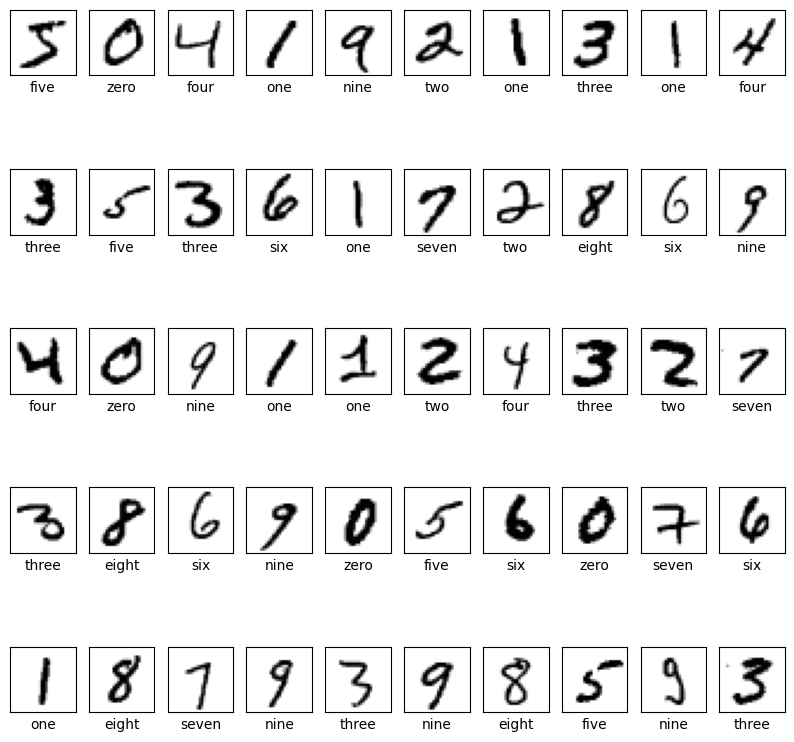

In [239]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

***Configuramos las capas el modelo para posteriormente poder compilarlo***

In [250]:
# Configuramos las capas 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos al modelo
model.fit(train_images, train_labels, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 9s 4ms/step - loss: 2.5242 - accuracy: 0.8643
Epoch 2/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3786 - accuracy: 0.9105
Epoch 3/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2737 - accuracy: 0.9297
Epoch 4/9
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2497 - accuracy: 0.9372
Epoch 5/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2300 - accuracy: 0.9416
Epoch 6/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2157 - accuracy: 0.9459
Epoch 7/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2037 - accuracy: 0.9501
Epoch 8/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1971 - accuracy: 0.9517
Epoch 9/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1851 - accuracy: 0.9540


In [261]:
#Se evalua la exactitud del set de datos.
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2717 - accuracy: 0.9429 - 738ms/epoch - 2ms/step

Test accuracy: 0.9429000020027161


En este caso la exactitud del set del datos es ligeramente mayor (0.011 mayor) que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenammiento y el test se debe a un underfitting.

***Se hacen las predicciones***

In [252]:
predictions = model.predict(test_images)
predictions[8]


313/313 [==============================] - 1s 2ms/step


array([0.17659649, 0.04125377, 0.10041405, 0.06454818, 0.0741286 ,
       0.07184755, 0.08451052, 0.04373437, 0.23557614, 0.1073904 ],
      dtype=float32)

Una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes


In [253]:
np.argmax(predictions[0])
test_labels[0]

7

Graficamos para poder ver todo el set de predicciones de las 10 clases


In [254]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'orange'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                       100*np.max(predictions_array),
                                        class_name[true_label]),
             color=color)
  def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#33333")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('orange')
    thisplot[true_label].set_color('green')

Miremos la imagen [5], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. 


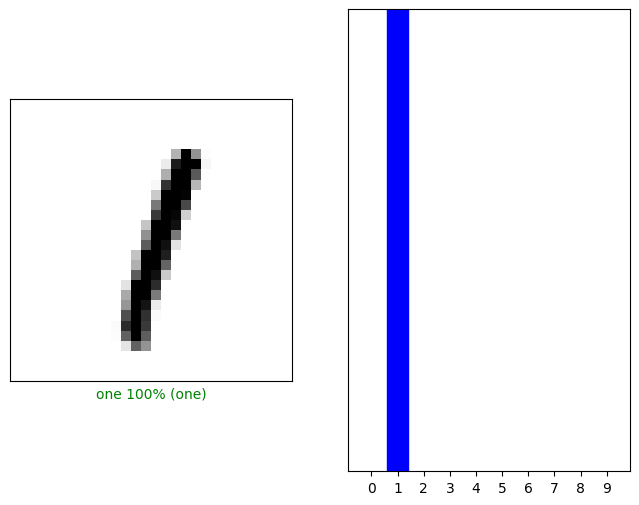

In [255]:
#El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

i = 5
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Ahora hacemos lo mismo pero con la imagen numero 7

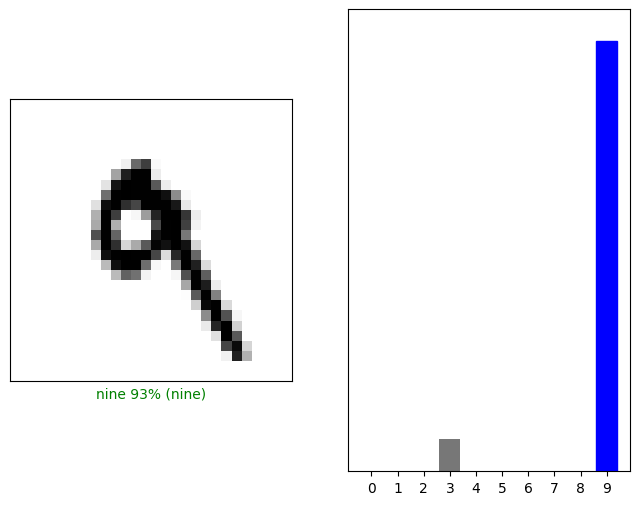

In [256]:
i = 7
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Vemos como el modelo puede estar equivocado aun cuando tiene mucha confianza.


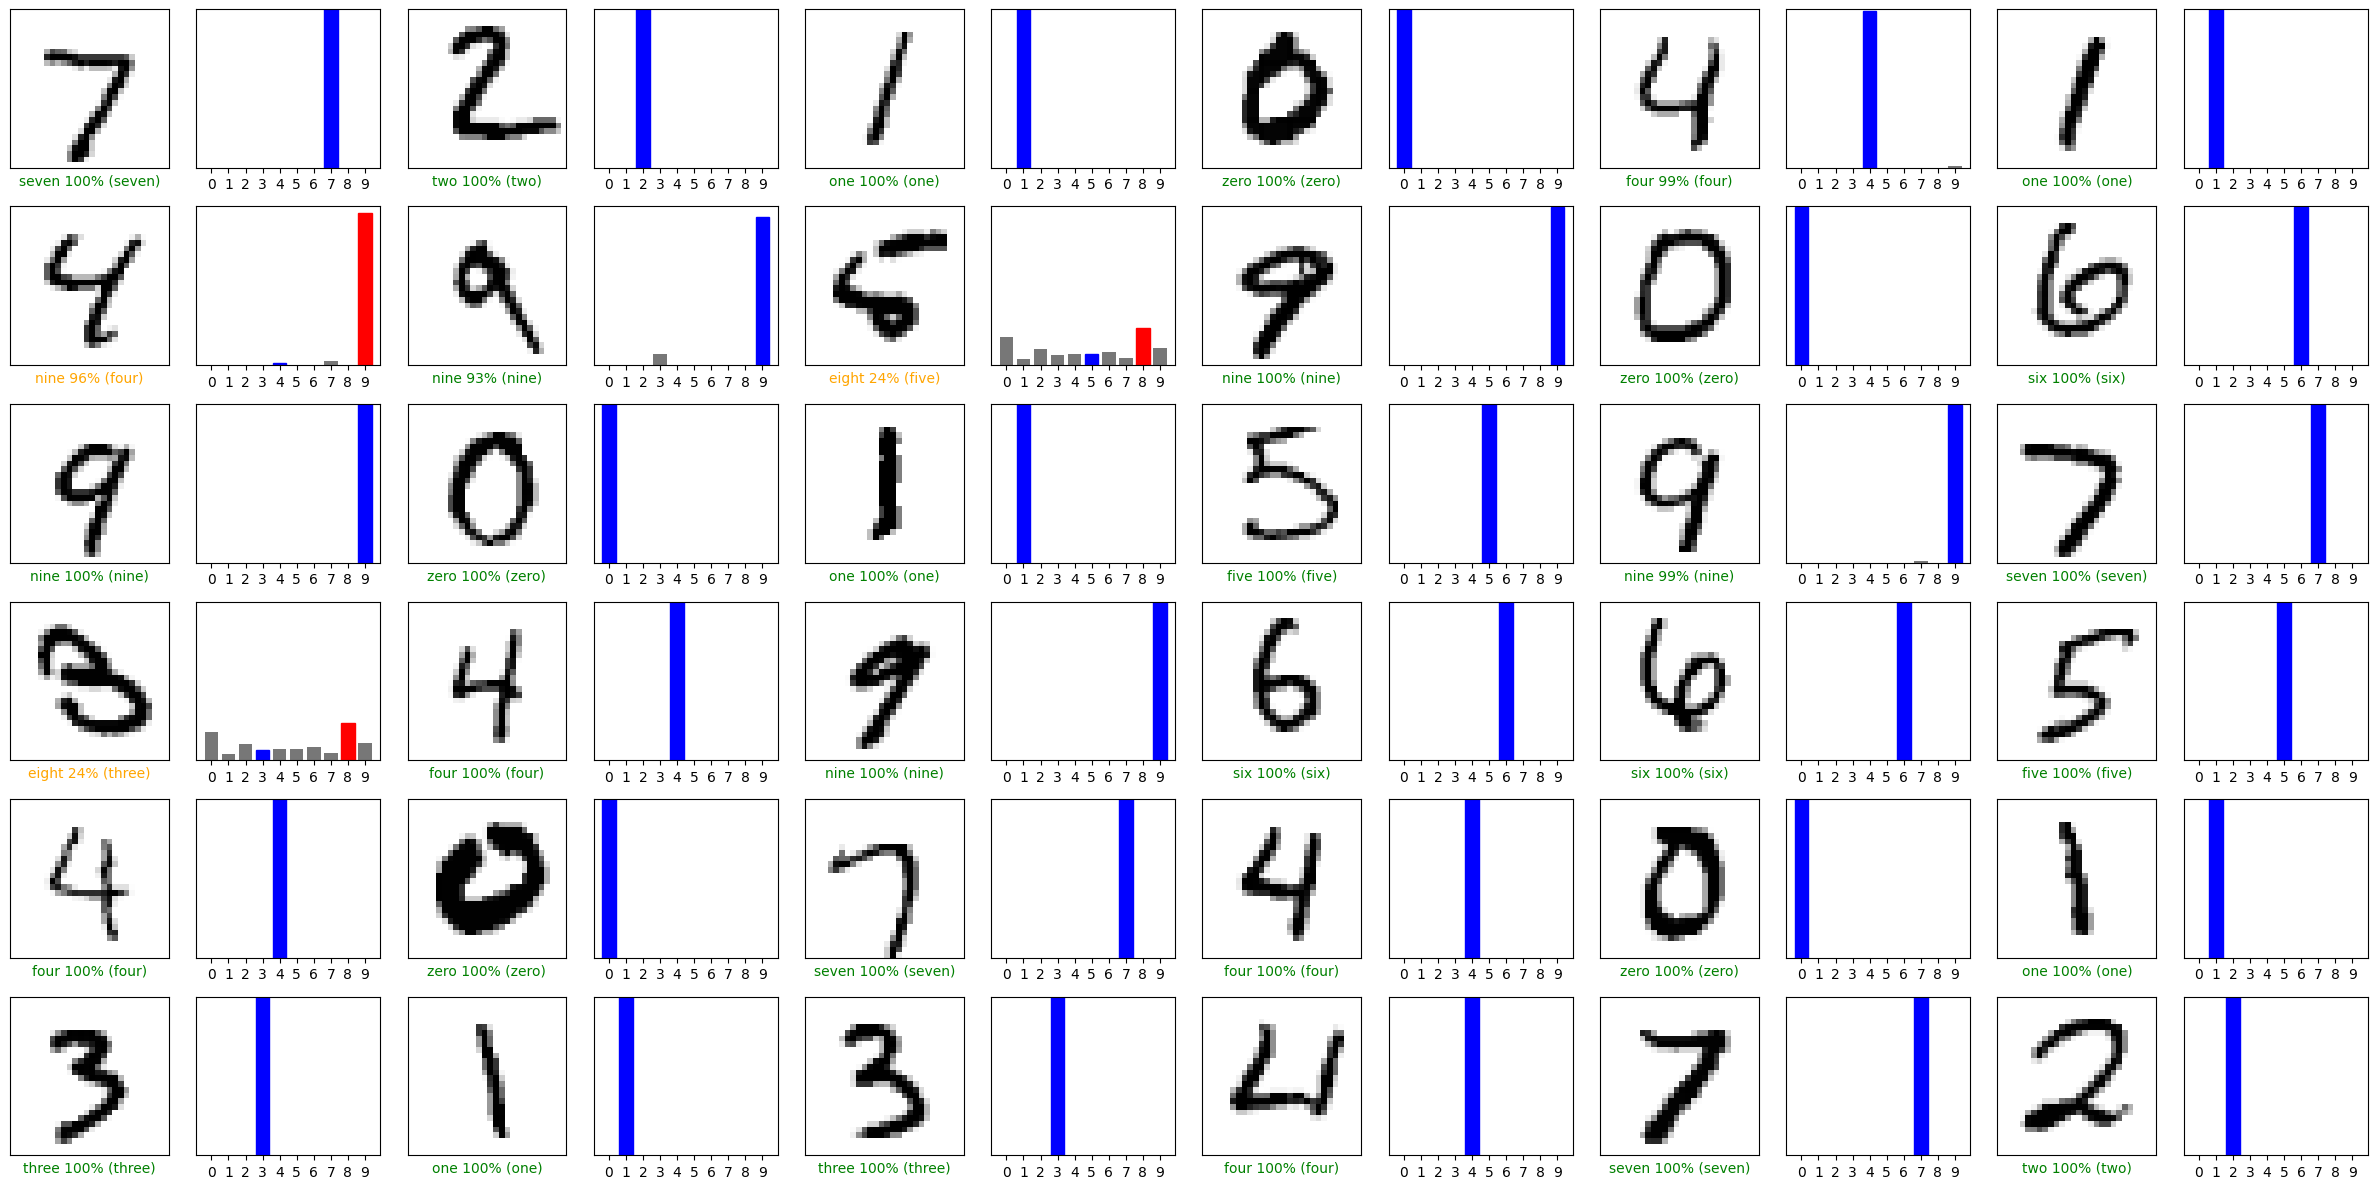

In [257]:
num_rows = 6
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

***Para terminar, hacemos una predicción con una unica imagen con nuestro modelo ya entrenado***

In [258]:
# Tomamos una imagen del conjunto de datos de prueba.
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


1/1 [==============================] - 0s 27ms/step
[[0.0000000e+00 5.1783530e-12 1.0000000e+00 1.2621320e-32 5.4995365e-27
  0.0000000e+00 1.3197827e-35 0.0000000e+00 1.3067502e-31 0.0000000e+00]]


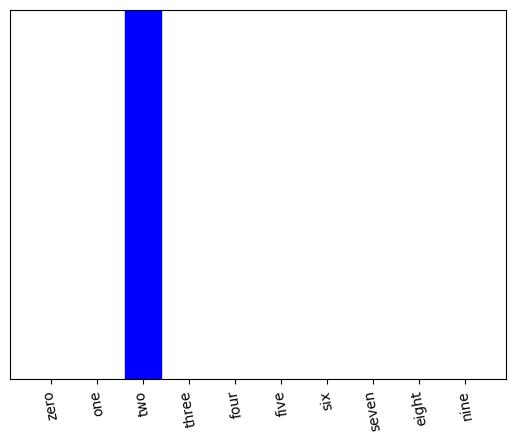

In [259]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_name, rotation=100)

In [260]:
np.argmax(predictions_single[0])

2

*Y* el modelo predice una etiqueta de 2.